In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

#Uploading the dataset
from google.colab import drive
drive.mount('/content/drive')
data_path = '/content/drive/My Drive/Colab Notebooks/diabetes.csv'
df = pd.read_csv(data_path)

# Display the first few rows to confirm it's loaded correctly
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0      NaN  33.6   
1            1     85.0           66.0           29.0      NaN  26.6   
2            8    183.0           64.0            NaN      NaN  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  



Missing Values Count:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


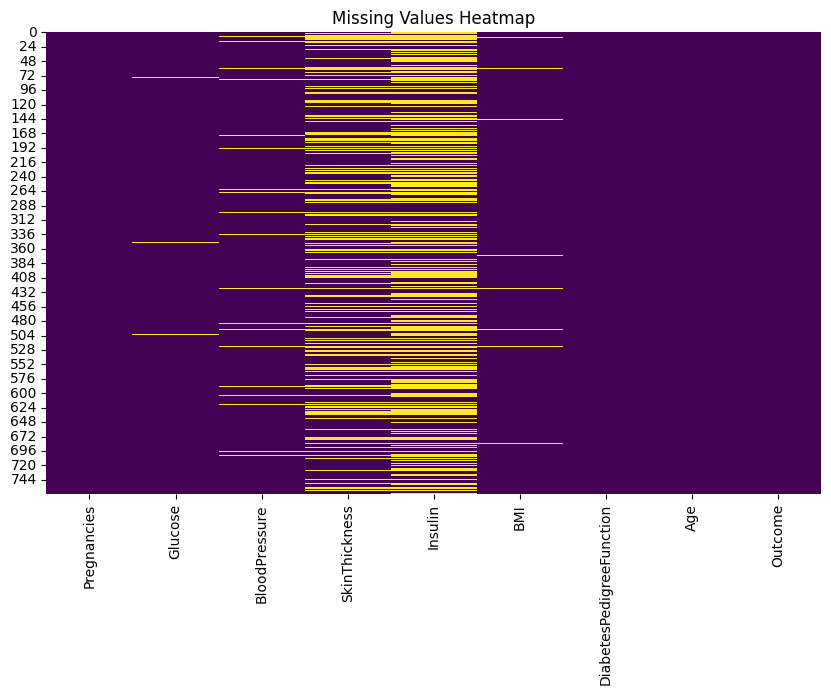

In [ ]:
# Check for missing values
print("\nMissing Values Count:")
print(df.isnull().sum())
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [ ]:
# Data Quality Report for Continuous Features
continuous_columns = df.select_dtypes(include=['number']).columns
continuous_dqr = pd.DataFrame({
    'Feature': continuous_columns,
    'Count': df[continuous_columns].count(),
    '% Missing': df[continuous_columns].isnull().mean() * 100,
    'Min': df[continuous_columns].min(),
    'Max': df[continuous_columns].max(),
    'Median': df[continuous_columns].median(),
    'Average': df[continuous_columns].mean(),
    'Std. Dev': df[continuous_columns].std()
})

# Display Data Quality Report for Continuous Features
from IPython.display import display
print("Data Quality Report for Continuous Features:")
display(continuous_dqr)

Data Quality Report for Continuous Features:


,Feature,Count,% Missing,Min,Max,Median,Average,Std. Dev
Pregnancies,Pregnancies,768,0.0,0.000,17.00,3.0000,3.845052,3.369578
Glucose,Glucose,768,0.0,44.000,199.00,117.0000,121.656250,30.438286
BloodPressure,BloodPressure,768,0.0,24.000,122.00,72.0000,72.386719,12.096642
SkinThickness,SkinThickness,768,0.0,7.000,99.00,29.0000,29.108073,8.791221
Insulin,Insulin,768,0.0,14.000,846.00,125.0000,140.671875,86.383060
BMI,BMI,768,0.0,18.200,67.10,32.3000,32.455208,6.875177
DiabetesPedigreeFunction,DiabetesPedigreeFunction,768,0.0,0.078,2.42,0.3725,0.471876,0.331329
Age,Age,768,0.0,21.000,81.00,29.0000,33.240885,11.760232
Outcome,Outcome,768,0.0,0.000,1.00,0.0000,0.348958,0.476951


In [ ]:
# Handle true missing values and inappropriate zeros together
columns_with_inappropriate_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
columns_with_missing_values = df.columns[df.isnull().any()].tolist()

# Use imputer to fill missing values with the median of the column
imputer = SimpleImputer(strategy='median')

# Apply imputer to columns with missing values and inappropriate zeros
df[columns_with_missing_values] = imputer.fit_transform(df[columns_with_missing_values])
df[columns_with_inappropriate_zeros] = imputer.fit_transform(df[columns_with_inappropriate_zeros])

# Confirm there are no more missing values
print("Missing Values After Imputation:")
print(df.isnull().sum())

Missing Values After Imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64



Missing Values Count:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


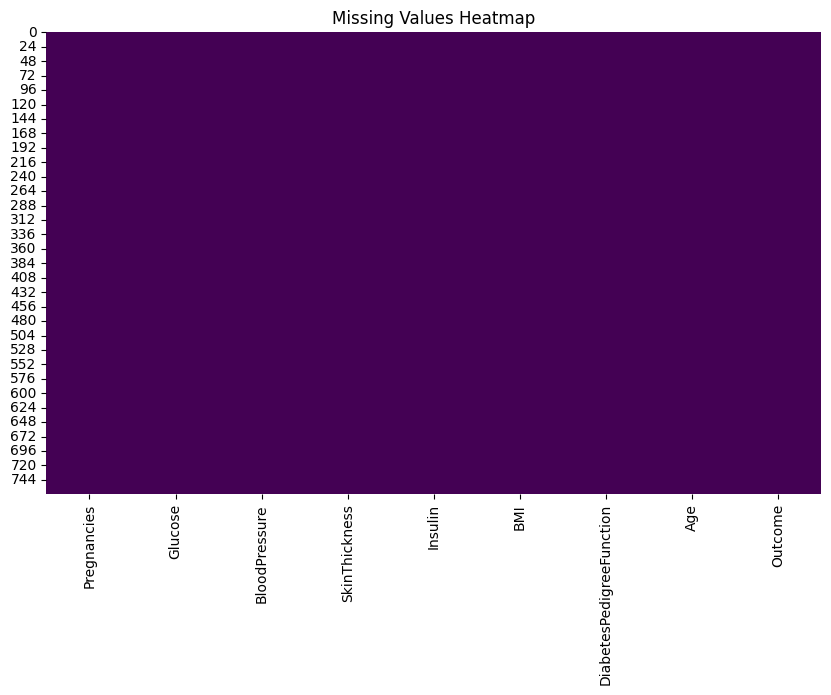

In [ ]:
# Check for missing values
print("\nMissing Values Count:")
print(df.isnull().sum())
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [ ]:
# Data Quality Report for Continuous Features
continuous_columns = df.select_dtypes(include=['number']).columns
continuous_dqr = pd.DataFrame({
    'Feature': continuous_columns,
    'Count': df[continuous_columns].count(),
    '% Missing': df[continuous_columns].isnull().mean() * 100,
    'Min': df[continuous_columns].min(),
    'Max': df[continuous_columns].max(),
    'Median': df[continuous_columns].median(),
    'Average': df[continuous_columns].mean(),
    'Std. Dev': df[continuous_columns].std()
})

# Display Data Quality Report for Continuous Features
from IPython.display import display
print("Data Quality Report for Continuous Features:")
display(continuous_dqr)

Data Quality Report for Continuous Features:


,Feature,Count,% Missing,Min,Max,Median,Average,Std. Dev
Pregnancies,Pregnancies,768,0.0,0.000,17.00,3.0000,3.845052,3.369578
Glucose,Glucose,768,0.0,44.000,199.00,117.0000,121.656250,30.438286
BloodPressure,BloodPressure,768,0.0,24.000,122.00,72.0000,72.386719,12.096642
SkinThickness,SkinThickness,768,0.0,7.000,99.00,29.0000,29.108073,8.791221
Insulin,Insulin,768,0.0,14.000,846.00,125.0000,140.671875,86.383060
BMI,BMI,768,0.0,18.200,67.10,32.3000,32.455208,6.875177
DiabetesPedigreeFunction,DiabetesPedigreeFunction,768,0.0,0.078,2.42,0.3725,0.471876,0.331329
Age,Age,768,0.0,21.000,81.00,29.0000,33.240885,11.760232
Outcome,Outcome,768,0.0,0.000,1.00,0.0000,0.348958,0.476951


In [ ]:
# Identifying potential outliers using visualizations and statistical methods
#print("\nIdentifying potential outliers using visualizations:")

# Boxplots for continuous features to visualize potential outliers
#for column in continuous_columns:
    #plt.figure(figsize=(10, 5))
    #sns.boxplot(x=df[column])
    #plt.title(f'Boxplot of {column}')
    #plt.xlabel(column)
    #plt.show()

# Histograms for continuous features to visualize data distribution
#for column in continuous_columns:
   # plt.figure(figsize=(10, 5))
   # sns.histplot(df[column], kde=True)
   # plt.title(f'Histogram of {column}')
    #plt.xlabel(column)
    #plt.ylabel('Frequency')
   # plt.show()

In [ ]:
# Split the data into features and the target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize the logistic regression model
log_reg = LogisticRegression()

# Train the model on the scaled training data
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
# Predict the outcomes for the testing data
y_pred = log_reg.predict(X_test_scaled)

# Calculate the accuracy of the model and display the classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy of the model: {accuracy*100:.2f}%")
print("Classification Report:")
print(report)

Accuracy of the model: 74.03%
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       151
           1       0.64      0.59      0.61        80

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231



In [ ]:
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
import pandas as pd

# Assuming X_train, y_train, X_test, y_test are already defined and preprocessed

# Feature Engineering: Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)

# Handle imbalanced dataset with SMOTE
smote = SMOTE(random_state=42)

# Random Forest Model
model = RandomForestClassifier(random_state=42)

# Create a pipeline that can handle SMOTE correctly
pipeline = ImbPipeline([
    ('poly', poly),
    ('scaler', StandardScaler()),
    ('smote', smote),
    ('classifier', model)
])

# Define hyperparameters to tune
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Grid Search with Cross-Validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Improved Model Accuracy: {accuracy*100:.2f}%")
print("Improved Classification Report:")
print(report)

Improved Model Accuracy: 74.89%
Improved Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.75      0.80       151
           1       0.61      0.75      0.67        80

    accuracy                           0.75       231
   macro avg       0.73      0.75      0.73       231
weighted avg       0.77      0.75      0.75       231



In [ ]:
X_train['Age*Glucose'] = X_train['Age'] * X_train['Glucose']
X_test['Age*Glucose'] = X_test['Age'] * X_test['Glucose']

X_train['BMI*BloodPressure'] = X_train['BMI'] * X_train['BloodPressure']
X_test['BMI*BloodPressure'] = X_test['BMI'] * X_test['BloodPressure']

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train[['Glucose', 'BMI', 'Age', 'BloodPressure']])
X_test_poly = poly.transform(X_test[['Glucose', 'BMI', 'Age', 'BloodPressure']])

X_train['Age_bin'] = pd.cut(X_train['Age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=False)
X_test['Age_bin'] = pd.cut(X_test['Age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=False)

X_train['BMI_bin'] = pd.cut(X_train['BMI'], bins=[0, 18.5, 25, 30, 35, 40, 50], labels=False)
X_test['BMI_bin'] = pd.cut(X_test['BMI'], bins=[0, 18.5, 25, 30, 35, 40, 50], labels=False)

X_train['Log_Insulin'] = np.log(X_train['Insulin'] + 1)
X_test['Log_Insulin'] = np.log(X_test['Insulin'] + 1)



In [ ]:
# Assuming X_train and X_test are already defined and contain the basic data

# Adding interaction terms
X_train['Age*Glucose'] = X_train['Age'] * X_train['Glucose']
X_test['Age*Glucose'] = X_test['Age'] * X_test['Glucose']

# Retraining the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"New Model Accuracy: {accuracy*100:.2f}%")
print("New Classification Report:")
print(report)


New Model Accuracy: 75.76%
New Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       151
           1       0.64      0.68      0.66        80

    accuracy                           0.76       231
   macro avg       0.73      0.74      0.74       231
weighted avg       0.76      0.76      0.76       231

